# Suicide Rates Overview 1985 to 2014
문제: 
train set에는 1985년부터 2014년까지의 국가 별 자살 인구수 통계가
나와 있습니다. 

이 데이터를 가지고 다음 해 국가 별 자살 인구수를 예측하는 문제.

https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016/kernels


## 목차 

1. Collecting the data
2. Exploratory data analysis
3. Feature engineering
4. Modeling 
5. Testing

## 1. Collecting the data




In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv('suicide_data/train.csv')
test = pd.read_csv('suicide_data/test_mini.csv')

## 2. Exploratory data analysis

country, year, sex, age group, count of suicides, population, suicide rate, country-year composite key, HDI for year, gdp_for_year, gdp_per_capita, generation (based on age grouping average).


In [2]:
train.head(5)

,country,year,sex,age,suicides_no,population,suicides_100k_pop,country_year,HDI_for_year,gdp_for_year,gdp_per_capital,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
train.shape

(26916, 12)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26916 entries, 0 to 26915
Data columns (total 12 columns):
country              26916 non-null object
year                 26916 non-null int64
sex                  26916 non-null object
age                  26916 non-null object
suicides_no          26916 non-null int64
population           26916 non-null int64
suicides_100k_pop    26916 non-null float64
country_year         26916 non-null object
HDI_for_year         8364 non-null float64
gdp_for_year         26916 non-null object
gdp_per_capital      26916 non-null int64
generation           26916 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [5]:
train.isnull().sum()

country                  0
year                     0
sex                      0
age                      0
suicides_no              0
population               0
suicides_100k_pop        0
country_year             0
HDI_for_year         18552
gdp_for_year             0
gdp_per_capital          0
generation               0
dtype: int64

## 3. Feature engineering

In [6]:
# 필요없는 컬럼 삭제

features_drop = ['country_year', 'HDI_for_year', 'gdp_for_year']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)

# train = train.drop(['country'], axis=1)

In [7]:
train.head()

,country,year,sex,age,suicides_no,population,suicides_100k_pop,gdp_per_capital,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,796,Boomers


In [8]:
test.head()

,country,year,sex,age,population,suicides_100k_pop,gdp_per_capital,generation
0,Antigua and Barbuda,2015,female,55-74 years,6403,15.62,14853,Boomers
1,Antigua and Barbuda,2015,female,15-24 years,8561,0.00,14853,Millenials
2,Antigua and Barbuda,2015,female,25-34 years,7740,0.00,14853,Millenials
3,Antigua and Barbuda,2015,female,35-54 years,15323,0.00,14853,Generation X
4,Antigua and Barbuda,2015,female,5-14 years,8239,0.00,14853,Generation Z


In [9]:
train_test_data = [train, test]

sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['sex'] = dataset['sex'].map(sex_mapping)
  
    

In [10]:
age_mapping = {"5-14 years":0,"15-24 years":1,"25-34 years":2,"35-54 years":3,"55-74 years":4,"75+ years":5}

for dataset in train_test_data:
    dataset['age'] = dataset['age'].map(age_mapping)


In [11]:
# country_mapping = {"Albania":0, "Antigua and Barbuda":1, "Argentina":2, "Armenia":3, "Aruba":100,
#        "Australia":4, "Austria":5, "Azerbaijan":6, "Bahamas":7, "Bahrain":8,
#        "Barbados":9, "Belarus":10, "Belgium":11, "Belize":12,
#        "Bosnia and Herzegovina":13, "Brazil":14, "Bulgaria":15, "Cabo Verde":16,
#        "Canada":17, "Chile":18, "Colombia":19, "Costa Rica":20, "Croatia":21, "Cuba":22,
#        "Cyprus":23, "Czech Republic":24, "Denmark":25, "Dominica":26, "Ecuador":27,
#        "El Salvador":28, "Estonia":29, "Fiji":30, "Finland":31, "France":32, "Georgia":33,
#        "Germany":34, "Greece":35, "Grenada":36, "Guatemala":37, "Guyana":38, "Hungary":39,
#        "Iceland":40, "Ireland":41, "Israel":42, "Italy":43, "Jamaica":44, "Japan":45,
#        "Kazakhstan":46, "Kiribati":47, "Kuwait":48, "Kyrgyzstan":49, "Latvia":50,
#        "Lithuania":51, "Luxembourg":52, "Macau":53, "Maldives":54, "Malta":55,
#        "Mauritius":56, "Mexico":57, "Mongolia":58, "Montenegro":59, "Netherlands":60,
#        "New Zealand":61, "Nicaragua":62, "Norway":63, "Oman":64, "Panama":65, "Paraguay":66,
#        "Philippines":67, "Poland":68, "Portugal":69, "Puerto Rico":70, "Qatar":71,
#        "Republic of Korea":72, "Romania":73, "Russian Federation":74,
#        "Saint Kitts and Nevis":75, "Saint Lucia":76,
#        "Saint Vincent and Grenadines":77, "San Marino":78, "Serbia":79,
#        "Seychelles":80, "Singapore":81, "Slovakia":82, "Slovenia":83, "South Africa":84,
#        "Spain":85, "Sri Lanka":86, "Suriname":87, "Sweden":88, "Switzerland":89,
#        "Thailand":90, "Trinidad and Tobago":91, "Turkey":92, "Turkmenistan":93,
#        "Ukraine":94, "United Arab Emirates":95, "United Kingdom":96,
#        "United States":97, "Uruguay":98, "Uzbekistan":99}


country_mapping = {}
for x in ('Armenia','Azerbaijan', 'Bahrain','Israel','Japan','Kazakhstan', 'Kuwait','Kyrgyzstan','Macau','Maldives','Mongolia','Oman','Philippines','Qatar','Republic of Korea','Russian Federation','Sri Lanka','Thailand','Turkey','Turkmenistan','United Arab Emirates','Singapore','Uzbekistan'):
    country_mapping[x] = 1
for x in ('Albania', 'Austria','Belarus','Belgium','Croatia','Serbia','Cyprus','Sweden','Norway','Netherlands','Bosnia and Herzegovina','Bulgaria','Czech Republic','Denmark','Estonia','Finland', 'France','Georgia','Germany', 'Greece','Hungary','Iceland', 'Ireland', 'Italy','Latvia','Lithuania', 'Luxembourg','Malta','Montenegro','Poland', 'Portugal', 'Romania','San Marino','Slovakia','Slovenia', 'Spain','Switzerland', 'Ukraine','United Kingdom'):
    country_mapping[x] = 2
for x in ('Antigua and Barbuda','Bahamas','Costa Rica','Barbados','Cuba','Belize','Canada','Dominica', 'El Salvador','Grenada','Guatemala','Jamaica','Nicaragua','Panama','Puerto Rico','Saint Kitts and Nevis','Saint Vincent and Grenadines','Saint Lucia','United States'):
    country_mapping[x]=3
for x in ('Argentina','Chile','Colombia','Brazil','Cabo Verde','Ecuador', 'Guyana','Mexico','Paraguay','Suriname','Uruguay','Trinidad and Tobago'):
    country_mapping[x]=4
for x in ( 'Australia', 'Fiji','Kiribati','New Zealand'):
    country_mapping[x]=5
for x in ('Nicaragua','Mauritius','South Africa','Aruba','Seychelles'):
    country_mapping[x]=6
    
for dataset in train_test_data:
    dataset['country'] = dataset['country'].map(country_mapping)

In [12]:
generation_mapping = {"Generation X":0, "Silent":1, "G.I. Generation":2, "Boomers":3, "Millenials":4, "Generation Z":5}

for dataset in train_test_data:
    dataset['generation'] = dataset['generation'].map(generation_mapping)

In [13]:

def normalize(X):
    return np.abs((X-np.mean(X))/np.std(X))
for dataset in train_test_data:
    #dataset['year']=normalize(dataset['year'])
    dataset['gdp_per_capital']=normalize(dataset['gdp_per_capital'])
    dataset['population']=normalize(dataset['population'])

In [14]:
test.head()

,country,year,sex,age,population,suicides_100k_pop,gdp_per_capital,generation
0,3,2015,1,4,0.499234,15.62,0.4737,3
1,3,2015,1,1,0.498781,0.00,0.4737,4
2,3,2015,1,2,0.498953,0.00,0.4737,4
3,3,2015,1,3,0.497362,0.00,0.4737,0
4,3,2015,1,0,0.498848,0.00,0.4737,5


## Feature Selection

In [17]:
X = train.drop(['suicides_no'],axis=1)  #independent columns
y = train['suicides_no']

In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

               Specs          Score
5  suicides_100k_pop  276311.393418
4         population   22582.661530
7         generation    2964.136732
3                age    2685.384826
2                sex    1584.146986
0            country    1356.563928
6    gdp_per_capital     818.392358
1               year      66.925797


C:\Users\hyunju\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


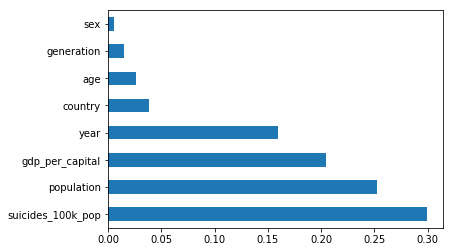

In [20]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

## 4. Modeling 

In [27]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier


import numpy as np



### Cross Validation ( K- fold)
  Cross Validation를 통한 validation 정확도 향상

In [22]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)


target = train['suicides_no']

### 4.1 SVM 모델

In [23]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

C:\Users\hyunju\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\hyunju\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\hyunju\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\hyunju\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureW

[0.49888559 0.47585438 0.49554235 0.47622585 0.50111441 0.5089153
 0.51021925 0.49052397 0.47491639 0.51282051]


In [24]:
print('Accuracy score:'+round(np.mean(score)*100,2))

49.45

### 4.2 XGBOOST 모델

In [ ]:
clf = XGBClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

In [ ]:
print('Accuracy score:'+round(np.mean(score)*100,2))

## 5. Test

In [ ]:
clf = SVC()
clf.fit(train_data, target)

test_data = test
prediction = clf.predict(test_data)

In [ ]:
submission = pd.DataFrame({
        "Country": test["Country"],
        "Prediction_No": prediction
    })

submission.to_csv('submission_suicide.csv', index=False)

In [ ]:
submission = pd.read_csv('submission_suicide.csv')
submission.head()